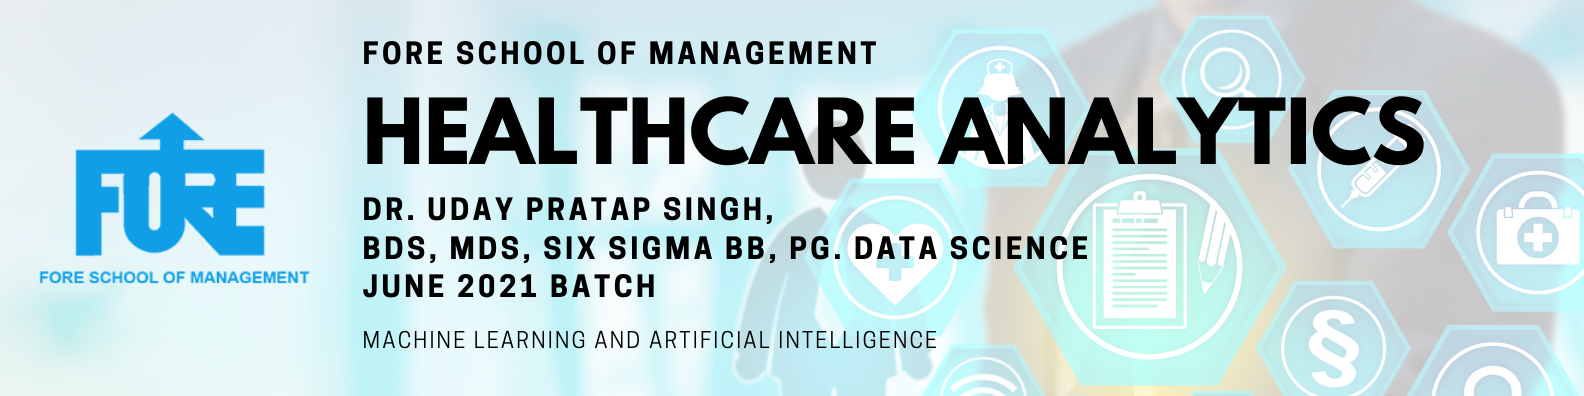

# Kaggle Project: Predict a biological response of molecules from their chemical properties

#### Refer: https://www.kaggle.com/c/bioresponse
#### Also see: https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm

## The objective of the competition is to help us build as good a model as possible so that we can, as optimally as this data allows, relate molecular information, to an actual biological response.

## We have shared the data in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.

___________

___________

## Cost of False Positive:
### The molecule will be considered as 'Active' when in reality it is not. Because of being a False Negative, it will be pushed forward in the phase of the trial, but will in reality be ineffective. Consequences are financial loss, legal loss if there is any harm in a patient, risk to human life.

## Cost of False Negative:
### The moledule will be considered as 'Inactive' when in reality it is actually 'Active'. The molecule will not be forwarded in the trial and will be lost to humanity. Consequences are 'possible/ potential' financial loss, cost to the organisation in building an actually 'Active' molecule but considering it to be 'Inactive'. No loss to human life concieved. No immediate actual dollar loss concieved. 

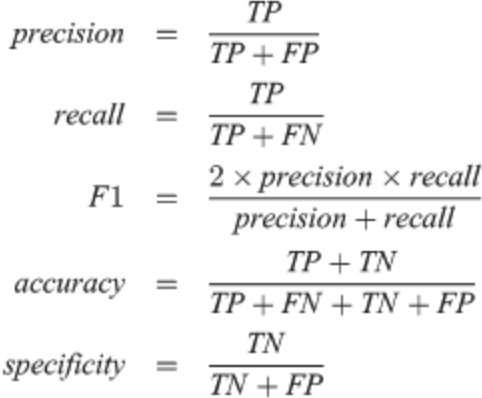

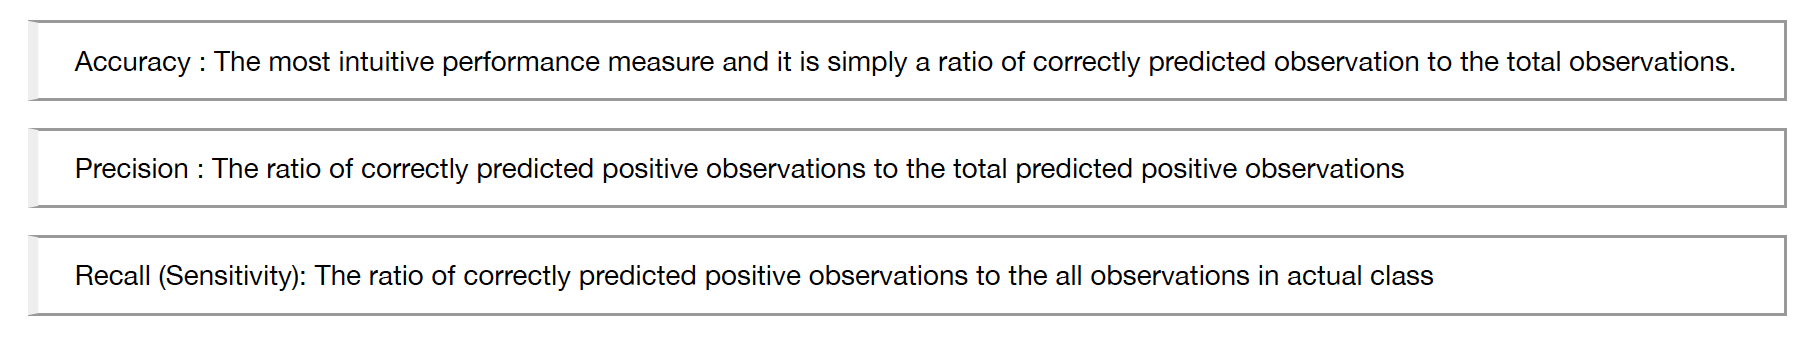

## Thus for the purpose of this analysis, 'Precision' would be the most important metric as it will help to optimize the reduction of False Positives.

___________

___________

## Summary of the various models
### RF_model_1: Random Forest model with 500 trees
### RF_model_base: Random Forest model with 100 trees
### best_grid: Random Forest model with 100 trees {'max_depth': 30, 'max_features': 1000, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 501}
### clf: Artificial Neural Network model {2 layers with 100 neurons each}
### clf: Artificial Neural Network model {3 layers with 10 neurons in first layer, 100 neurons in the second layer and 10 neurons in the last layer}

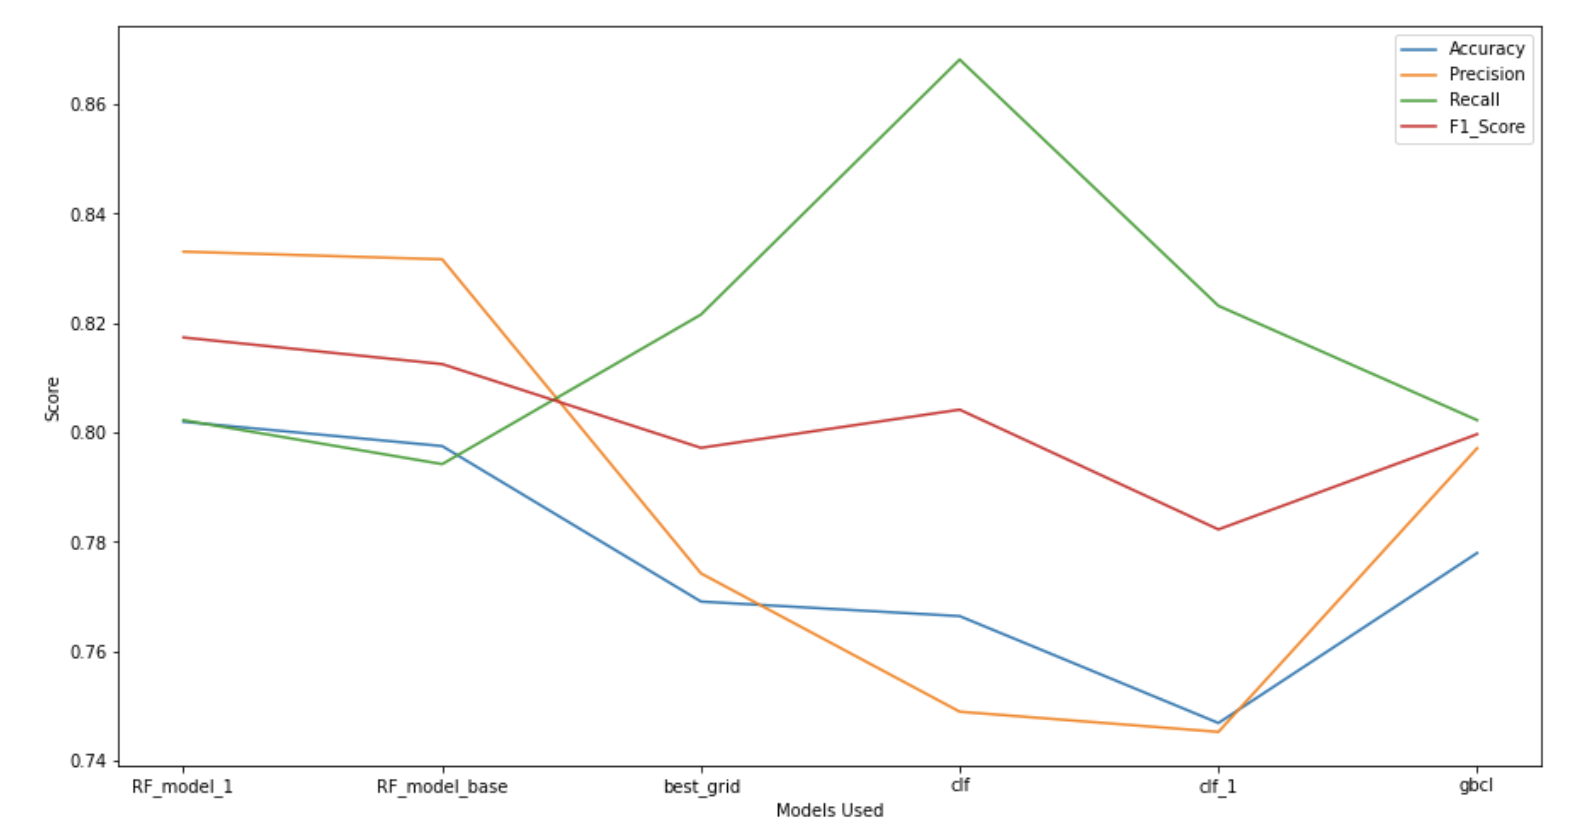

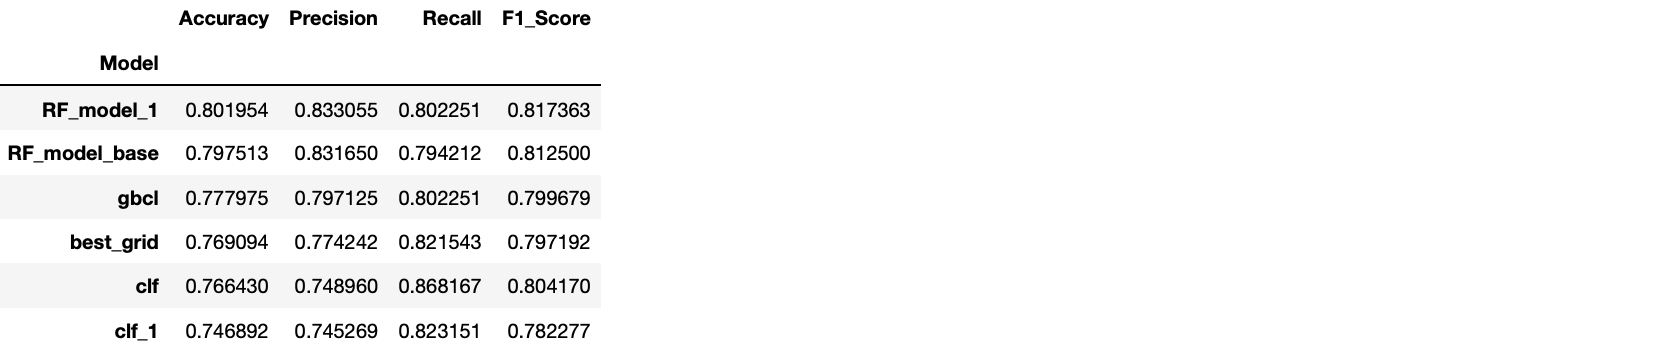

___________

___________

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import fancyimpute

## Reading the dataset

In [2]:
d=pd.read_csv("train.csv")

In [3]:
d.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


## Shape of the dataset

In [4]:
d.shape

(3751, 1777)

## Balance in the dataset

In [5]:
d.Activity.value_counts(normalize = True)

1    0.542255
0    0.457745
Name: Activity, dtype: float64

## Making a copy of the dataset

In [6]:
e = d.copy()

## Creating Training and Test sets

In [7]:
X = e.drop('Activity', axis = 1, inplace = False)
Y = e.pop('Activity')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

## Simple Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
RF_model_base=RandomForestClassifier(n_estimators=100,random_state=1)

In [10]:
RF_model_base.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [11]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [12]:
## Performance Matrix on train data set
Y_train_predict = RF_model_base.predict(X_train)
model_score = RF_model_base.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

1.0
[[1213    0]
 [   0 1412]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00      1412

    accuracy                           1.00      2625
   macro avg       1.00      1.00      1.00      2625
weighted avg       1.00      1.00      1.00      2625



### Over fitting in the training dataset

In [14]:
## Performance Matrix on test data set
Y_pred_te_RF_model_base = RF_model_base.predict(X_test)
model_score = RF_model_base.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_pred_te_RF_model_base))
print(metrics.classification_report(Y_test, Y_pred_te_RF_model_base))

0.7975133214920072
[[404 100]
 [128 494]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       504
           1       0.83      0.79      0.81       622

    accuracy                           0.80      1126
   macro avg       0.80      0.80      0.80      1126
weighted avg       0.80      0.80      0.80      1126



In [58]:
# Looking at the feature importances
importance = pd.DataFrame(RF_model_base.feature_importances_,columns=['Importance'])
importance['Variable'] = X_train.columns
importance=importance[['Variable','Importance']]

In [59]:
feature_importance = importance.sort_values('Importance', ascending=False).head(20)

<AxesSubplot:xlabel='Variable', ylabel='Importance'>

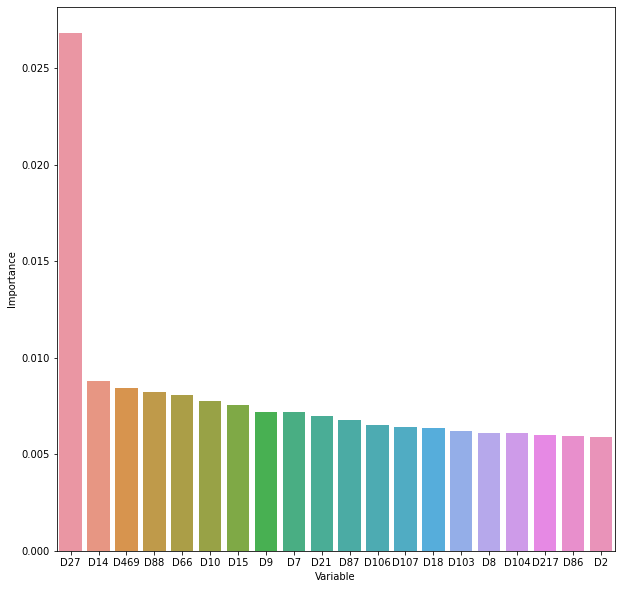

In [60]:
fig,axes = plt.subplots(figsize=(10,10))
sns.barplot(x = 'Variable', y = 'Importance', data = feature_importance)

### Moderate accuracy and moderate recall for activity presence

## Random Forest with 500 estimators

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF_model_1=RandomForestClassifier(n_estimators=500,random_state=1)

In [16]:
RF_model_1.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [17]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [18]:
## Performance Matrix on train data set
Y_train_predict = RF_model_1.predict(X_train)
model_score = RF_model_1.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

1.0
[[1213    0]
 [   0 1412]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00      1412

    accuracy                           1.00      2625
   macro avg       1.00      1.00      1.00      2625
weighted avg       1.00      1.00      1.00      2625



### Overfitting on the training dataset again

In [19]:
## Performance Matrix on test data set
Y_pred_te_RF_model_1 = RF_model_1.predict(X_test)
model_score = RF_model_1.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_pred_te_RF_model_1))
print(metrics.classification_report(Y_test, Y_pred_te_RF_model_1))

0.8019538188277087
[[404 100]
 [123 499]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       504
           1       0.83      0.80      0.82       622

    accuracy                           0.80      1126
   macro avg       0.80      0.80      0.80      1126
weighted avg       0.80      0.80      0.80      1126



In [61]:
# Looking at the feature importances
importance = pd.DataFrame(RF_model_1.feature_importances_,columns=['Importance'])
importance['Variable'] = X_train.columns
importance=importance[['Variable','Importance']]

In [62]:
feature_importance = importance.sort_values('Importance', ascending=False).head(20)

<AxesSubplot:xlabel='Variable', ylabel='Importance'>

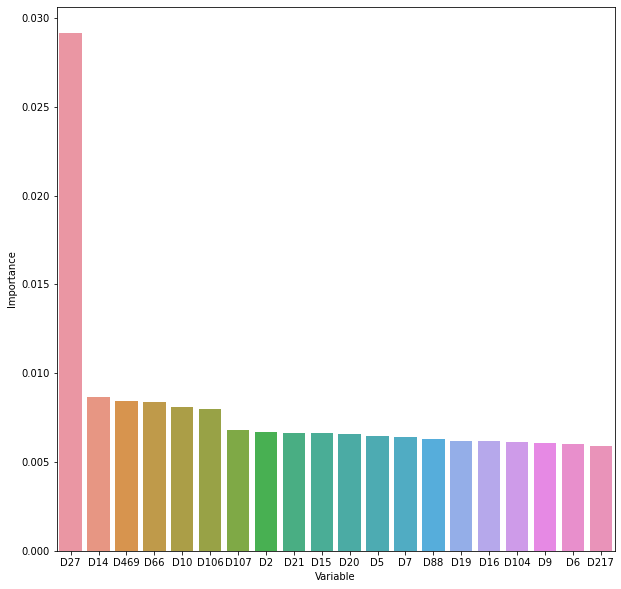

In [63]:
fig,axes = plt.subplots(figsize=(10,10))
sns.barplot(x = 'Variable', y = 'Importance', data = feature_importance)

### Moderate accuracy and moderate recall for activity presence

## Finetuning the Random Forest Model

In [20]:
X_train.shape

(2625, 1776)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [30],
    'max_features': [1000],
    'min_samples_leaf': [100, 200],
    'min_samples_split': [300, 500],
    'n_estimators': [501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [22]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30], 'max_features': [1000],
                         'min_samples_leaf': [100, 200],
                         'min_samples_split': [300, 500],
                         'n_estimators': [501]})

### Best parameters from GridSearchCV

In [23]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 1000,
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'n_estimators': 501}

In [24]:
best_grid = grid_search.best_estimator_

In [25]:
## Performance Matrix on train data set
Y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.7630476190476191
[[ 844  369]
 [ 253 1159]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1213
           1       0.76      0.82      0.79      1412

    accuracy                           0.76      2625
   macro avg       0.76      0.76      0.76      2625
weighted avg       0.76      0.76      0.76      2625



### Moderate performance on training set

In [26]:
## Performance Matrix on test data set
Y_pred_te_best_grid = best_grid.predict(X_test)
model_score = best_grid.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_pred_te_best_grid))
print(metrics.classification_report(Y_test, Y_pred_te_best_grid))

0.7690941385435168
[[355 149]
 [111 511]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       504
           1       0.77      0.82      0.80       622

    accuracy                           0.77      1126
   macro avg       0.77      0.76      0.76      1126
weighted avg       0.77      0.77      0.77      1126



In [27]:
# Looking at the feature importances
importance = pd.DataFrame(best_grid.feature_importances_,columns=['Importance'])
importance['Variable'] = X_train.columns
importance=importance[['Variable','Importance']]

In [28]:
feature_importance = importance.sort_values('Importance', ascending=False).head(20)

<AxesSubplot:xlabel='Variable', ylabel='Importance'>

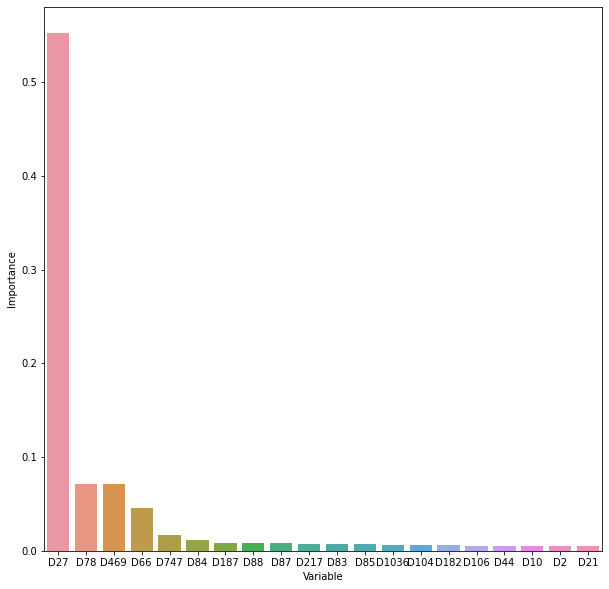

In [29]:
fig,axes = plt.subplots(figsize=(10,10))
sns.barplot(x = 'Variable', y = 'Importance', data = feature_importance)

## Molecule descriptors D27, D469, D78, D66 are the most consistently important features 

## Gradient Boosting

In [30]:
## Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

In [31]:
## Performance Matrix on test data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8643809523809524
[[1006  207]
 [ 149 1263]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1213
           1       0.86      0.89      0.88      1412

    accuracy                           0.86      2625
   macro avg       0.87      0.86      0.86      2625
weighted avg       0.86      0.86      0.86      2625



In [32]:
## Performance Matrix on test data set
Y_pred_te_gbcl = gbcl.predict(X_test)
model_score = gbcl.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_pred_te_gbcl))
print(metrics.classification_report(Y_test, Y_pred_te_gbcl))

0.7779751332149201
[[377 127]
 [123 499]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       504
           1       0.80      0.80      0.80       622

    accuracy                           0.78      1126
   macro avg       0.78      0.78      0.78      1126
weighted avg       0.78      0.78      0.78      1126



### Moderate performance, slightly better than Finetuned Random Forest model in terms of overall accuracy.

In [33]:
# Looking at the feature importances
importance_gbcl = pd.DataFrame(gbcl.feature_importances_,columns=['Importance'])
importance_gbcl['Variable'] = X_train.columns
importance_gbcl=importance_gbcl[['Variable','Importance']]

In [34]:
feature_importance_gbcl = importance_gbcl.sort_values('Importance', ascending=False).head(20)

<AxesSubplot:xlabel='Variable', ylabel='Importance'>

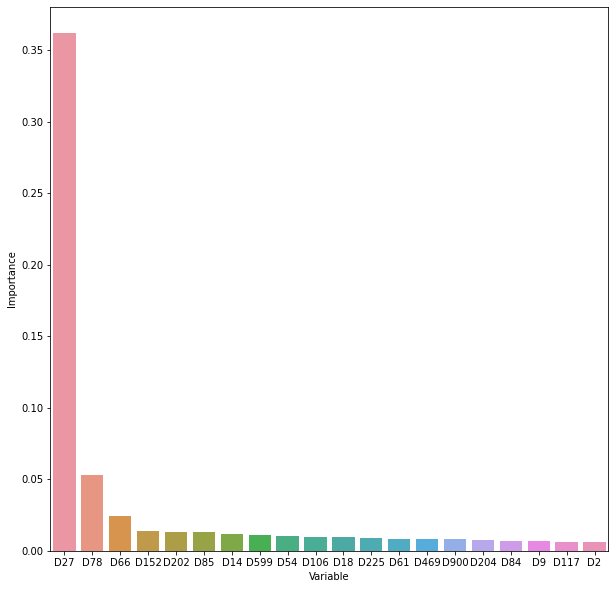

In [35]:
fig,axes = plt.subplots(figsize=(10,10))
sns.barplot(x = 'Variable', y = 'Importance', data = feature_importance_gbcl)

## Artificial Neural Networks

In [36]:
## ANN
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=5000, verbose=True,  random_state=21,tol=0.01)

In [37]:
# Fit the model on the training data
clf.fit(X_train, Y_train)

Iteration 1, loss = 0.67089407
Iteration 2, loss = 0.57580527
Iteration 3, loss = 0.49860662
Iteration 4, loss = 0.46739858
Iteration 5, loss = 0.41913652
Iteration 6, loss = 0.38203441
Iteration 7, loss = 0.35647586
Iteration 8, loss = 0.32800843
Iteration 9, loss = 0.30661922
Iteration 10, loss = 0.28360380
Iteration 11, loss = 0.27515959
Iteration 12, loss = 0.24245880
Iteration 13, loss = 0.23638142
Iteration 14, loss = 0.21091109
Iteration 15, loss = 0.20322211
Iteration 16, loss = 0.22462686
Iteration 17, loss = 0.18867911
Iteration 18, loss = 0.17024777
Iteration 19, loss = 0.15134345
Iteration 20, loss = 0.14570403
Iteration 21, loss = 0.13905519
Iteration 22, loss = 0.12602891
Iteration 23, loss = 0.11190837
Iteration 24, loss = 0.11085948
Iteration 25, loss = 0.10161526
Iteration 26, loss = 0.10535211
Iteration 27, loss = 0.09785169
Iteration 28, loss = 0.09327428
Iteration 29, loss = 0.09331838
Iteration 30, loss = 0.07619266
Iteration 31, loss = 0.06744985
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=5000, random_state=21,
              tol=0.01, verbose=True)

In [38]:
y_pred = clf.predict(X_train)
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1213
           1       0.95      1.00      0.97      1412

    accuracy                           0.97      2625
   macro avg       0.97      0.97      0.97      2625
weighted avg       0.97      0.97      0.97      2625



In [39]:
Y_pred_te_clf = clf.predict(X_test)
print(classification_report(Y_test, Y_pred_te_clf))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       504
           1       0.75      0.87      0.80       622

    accuracy                           0.77      1126
   macro avg       0.77      0.75      0.76      1126
weighted avg       0.77      0.77      0.76      1126



### Similar problem - over fitting on Training set and under performace on Test set

In [41]:
## ANN
from sklearn.neural_network import MLPClassifier
clf_1 = MLPClassifier(hidden_layer_sizes=[10, 100, 10], max_iter=5000, verbose=True, random_state=21,tol=0.001)

In [42]:
# Fit the model on the training data
clf_1.fit(X_train, Y_train)

Iteration 1, loss = 0.68741081
Iteration 2, loss = 0.65145486
Iteration 3, loss = 0.58838707
Iteration 4, loss = 0.51709253
Iteration 5, loss = 0.47311692
Iteration 6, loss = 0.44379630
Iteration 7, loss = 0.40744122
Iteration 8, loss = 0.38695809
Iteration 9, loss = 0.36659311
Iteration 10, loss = 0.35212441
Iteration 11, loss = 0.34387043
Iteration 12, loss = 0.33028633
Iteration 13, loss = 0.31579887
Iteration 14, loss = 0.31283620
Iteration 15, loss = 0.29195196
Iteration 16, loss = 0.28409459
Iteration 17, loss = 0.26389473
Iteration 18, loss = 0.25193879
Iteration 19, loss = 0.24216523
Iteration 20, loss = 0.23712004
Iteration 21, loss = 0.22720241
Iteration 22, loss = 0.24316621
Iteration 23, loss = 0.22216662
Iteration 24, loss = 0.20645675
Iteration 25, loss = 0.19230010
Iteration 26, loss = 0.19389879
Iteration 27, loss = 0.18422076
Iteration 28, loss = 0.17490305
Iteration 29, loss = 0.18326438
Iteration 30, loss = 0.17621361
Iteration 31, loss = 0.15671455
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[10, 100, 10], max_iter=5000, random_state=21,
              tol=0.001, verbose=True)

In [44]:
y_pred = clf_1.predict(X_train)
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1213
           1       0.93      1.00      0.96      1412

    accuracy                           0.96      2625
   macro avg       0.96      0.96      0.96      2625
weighted avg       0.96      0.96      0.96      2625



In [48]:
y_test_pred_clf_1 = clf_1.predict(X_test)
print(classification_report(Y_test, y_test_pred_clf_1))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       504
           1       0.75      0.82      0.78       622

    accuracy                           0.75      1126
   macro avg       0.75      0.74      0.74      1126
weighted avg       0.75      0.75      0.74      1126



### Similar problem - over fitting on training set

In [49]:
# Comparing the models as per performance on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['RF_model_base','RF_model_1','best_grid','gbcl','clf','clf_1']
acc=[]
pre=[]
rec=[]
f1=[]
testing_pred = [Y_pred_te_RF_model_base,Y_pred_te_RF_model_1,Y_pred_te_best_grid,Y_pred_te_gbcl,Y_pred_te_clf,y_test_pred_clf_1]
for i in testing_pred:
    acc.append(accuracy_score(Y_test,i))
    pre.append(precision_score(Y_test,i))
    rec.append(recall_score(Y_test,i))
    f1.append(f1_score(Y_test,i))
    
metric_df_test = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':pre,'Recall':rec,'F1_Score':f1})    

In [54]:
metric_df_test.set_index('Model').sort_values(by = 'Precision', ascending = False)

,Accuracy,Precision,Recall,F1_Score
Model,,,,
RF_model_1,0.801954,0.833055,0.802251,0.817363
RF_model_base,0.797513,0.831650,0.794212,0.812500
gbcl,0.777975,0.797125,0.802251,0.799679
best_grid,0.769094,0.774242,0.821543,0.797192
clf,0.766430,0.748960,0.868167,0.804170
clf_1,0.746892,0.745269,0.823151,0.782277


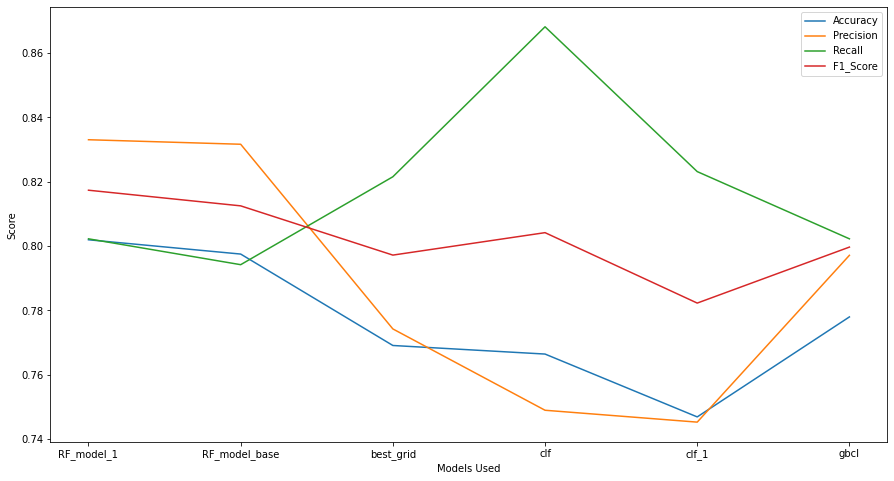

In [65]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x = 'Model', y= 'Accuracy', data = metric_df_test)
ax = sns.lineplot(x = 'Model', y= 'Precision', data = metric_df_test)
ax = sns.lineplot(x = 'Model', y= 'Recall', data = metric_df_test)
ax = sns.lineplot(x = 'Model', y= 'F1_Score', data = metric_df_test)
ax.set(xlabel='Models Used', ylabel='Score')
plt.legend(labels=['Accuracy', 'Precision', 'Recall', 'F1_Score'])

## Optional Finetuning = no significant improvement in the model

## Finetuning the ANN model

In [57]:
mlp = MLPClassifier()

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [50,50,50],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01],
    'max_iter': [200, 500],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 5)

In [45]:
X = e1.drop('Activity_1', axis = 1, inplace = False)
Y = e1.pop('Activity_1')

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [59]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [50, 50, 50],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [200, 500], 'solver': ['sgd', 'adam']})

In [60]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': 50,
 'learning_rate': 'adaptive',
 'max_iter': 500,
 'solver': 'sgd'}

In [61]:
best_grid = grid_search.best_estimator_

In [62]:
y_train_pred = best_grid.predict(X_train)
y_test_pred = best_grid.predict(X_test)

In [63]:
## Performance Matrix on train data set
model_score = best_grid.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_pred))
print(metrics.classification_report(Y_train, y_train_pred))

0.8883809523809524
[[1052  161]
 [ 132 1280]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1213
           1       0.89      0.91      0.90      1412

    accuracy                           0.89      2625
   macro avg       0.89      0.89      0.89      2625
weighted avg       0.89      0.89      0.89      2625



In [64]:
## Performance Matrix on test data set
model_score = best_grid.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_pred))
print(metrics.classification_report(Y_test, y_test_pred))

0.7593250444049734
[[378 126]
 [145 477]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       504
           1       0.79      0.77      0.78       622

    accuracy                           0.76      1126
   macro avg       0.76      0.76      0.76      1126
weighted avg       0.76      0.76      0.76      1126



### The End